In [1]:
import sys
sys.path.append("../../deep-learning-from-scratch-2")
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

In [7]:
class SkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer0 = SoftmaxWithLoss()
        self.loss_layer1 = SoftmaxWithLoss()
        
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        
        score = self.out_layer.forward(h)
        
        loss0 = self.loss_layer0.forward(score, contexts[:, 0])
        loss1 = self.loss_layer1.forward(score, contexts[:, 1])
        loss = loss0 + loss1
        
        return loss
    
    def backward(self, dout=1):
        ds0 = self.loss_layer0.backward(dout)
        ds1 = self.loss_layer1.backward(dout)
        ds = ds0 + ds1
        da = self.out_layer.backward(ds)
        
        self.in_layer.backward(da)
        return None
        

| epoch 1 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 2 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 3 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 4 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 5 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 6 |  iter 1 / 4 | time 0[s] | loss 4.80
| epoch 7 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 8 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 9 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 10 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 11 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 12 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 13 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 14 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 15 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 16 |  iter 1 / 4 | time 0[s] | loss 4.79
| epoch 17 |  iter 1 / 4 | time 0[s] | loss 4.78
| epoch 18 |  iter 1 / 4 | time 0[s] | loss 4.78
| epoch 19 |  iter 1 / 4 | time 0[s] | loss 4.78
| epoch 20 |  iter 1 / 4 | time 0[s] | loss 4.78
| epoch 21 |  iter 1 / 4 | ti

| epoch 218 |  iter 1 / 4 | time 0[s] | loss 3.24
| epoch 219 |  iter 1 / 4 | time 0[s] | loss 3.17
| epoch 220 |  iter 1 / 4 | time 0[s] | loss 3.17
| epoch 221 |  iter 1 / 4 | time 0[s] | loss 3.02
| epoch 222 |  iter 1 / 4 | time 0[s] | loss 3.28
| epoch 223 |  iter 1 / 4 | time 0[s] | loss 3.14
| epoch 224 |  iter 1 / 4 | time 0[s] | loss 3.09
| epoch 225 |  iter 1 / 4 | time 0[s] | loss 3.04
| epoch 226 |  iter 1 / 4 | time 0[s] | loss 3.19
| epoch 227 |  iter 1 / 4 | time 0[s] | loss 2.98
| epoch 228 |  iter 1 / 4 | time 0[s] | loss 3.18
| epoch 229 |  iter 1 / 4 | time 0[s] | loss 3.05
| epoch 230 |  iter 1 / 4 | time 0[s] | loss 3.15
| epoch 231 |  iter 1 / 4 | time 0[s] | loss 3.11
| epoch 232 |  iter 1 / 4 | time 0[s] | loss 3.03
| epoch 233 |  iter 1 / 4 | time 0[s] | loss 3.10
| epoch 234 |  iter 1 / 4 | time 0[s] | loss 3.09
| epoch 235 |  iter 1 / 4 | time 0[s] | loss 2.96
| epoch 236 |  iter 1 / 4 | time 0[s] | loss 3.10
| epoch 237 |  iter 1 / 4 | time 0[s] | loss 2.99


| epoch 394 |  iter 1 / 4 | time 1[s] | loss 2.50
| epoch 395 |  iter 1 / 4 | time 1[s] | loss 2.44
| epoch 396 |  iter 1 / 4 | time 1[s] | loss 2.56
| epoch 397 |  iter 1 / 4 | time 1[s] | loss 2.44
| epoch 398 |  iter 1 / 4 | time 1[s] | loss 2.72
| epoch 399 |  iter 1 / 4 | time 1[s] | loss 2.42
| epoch 400 |  iter 1 / 4 | time 1[s] | loss 2.49
| epoch 401 |  iter 1 / 4 | time 1[s] | loss 2.65
| epoch 402 |  iter 1 / 4 | time 1[s] | loss 2.40
| epoch 403 |  iter 1 / 4 | time 1[s] | loss 2.38
| epoch 404 |  iter 1 / 4 | time 1[s] | loss 2.57
| epoch 405 |  iter 1 / 4 | time 1[s] | loss 2.28
| epoch 406 |  iter 1 / 4 | time 1[s] | loss 2.48
| epoch 407 |  iter 1 / 4 | time 1[s] | loss 2.35
| epoch 408 |  iter 1 / 4 | time 1[s] | loss 2.87
| epoch 409 |  iter 1 / 4 | time 1[s] | loss 2.11
| epoch 410 |  iter 1 / 4 | time 1[s] | loss 2.53
| epoch 411 |  iter 1 / 4 | time 1[s] | loss 2.41
| epoch 412 |  iter 1 / 4 | time 1[s] | loss 2.49
| epoch 413 |  iter 1 / 4 | time 1[s] | loss 2.21


| epoch 589 |  iter 1 / 4 | time 2[s] | loss 2.29
| epoch 590 |  iter 1 / 4 | time 2[s] | loss 2.18
| epoch 591 |  iter 1 / 4 | time 2[s] | loss 2.13
| epoch 592 |  iter 1 / 4 | time 2[s] | loss 2.30
| epoch 593 |  iter 1 / 4 | time 2[s] | loss 2.39
| epoch 594 |  iter 1 / 4 | time 2[s] | loss 2.17
| epoch 595 |  iter 1 / 4 | time 2[s] | loss 2.16
| epoch 596 |  iter 1 / 4 | time 2[s] | loss 2.50
| epoch 597 |  iter 1 / 4 | time 2[s] | loss 2.00
| epoch 598 |  iter 1 / 4 | time 2[s] | loss 2.32
| epoch 599 |  iter 1 / 4 | time 2[s] | loss 2.09
| epoch 600 |  iter 1 / 4 | time 2[s] | loss 2.25
| epoch 601 |  iter 1 / 4 | time 2[s] | loss 2.12
| epoch 602 |  iter 1 / 4 | time 2[s] | loss 2.24
| epoch 603 |  iter 1 / 4 | time 2[s] | loss 2.26
| epoch 604 |  iter 1 / 4 | time 2[s] | loss 2.00
| epoch 605 |  iter 1 / 4 | time 2[s] | loss 2.35
| epoch 606 |  iter 1 / 4 | time 2[s] | loss 2.03
| epoch 607 |  iter 1 / 4 | time 2[s] | loss 2.47
| epoch 608 |  iter 1 / 4 | time 2[s] | loss 2.11


| epoch 792 |  iter 1 / 4 | time 3[s] | loss 2.29
| epoch 793 |  iter 1 / 4 | time 3[s] | loss 1.96
| epoch 794 |  iter 1 / 4 | time 3[s] | loss 2.26
| epoch 795 |  iter 1 / 4 | time 3[s] | loss 2.13
| epoch 796 |  iter 1 / 4 | time 3[s] | loss 2.15
| epoch 797 |  iter 1 / 4 | time 3[s] | loss 2.33
| epoch 798 |  iter 1 / 4 | time 3[s] | loss 2.37
| epoch 799 |  iter 1 / 4 | time 3[s] | loss 1.90
| epoch 800 |  iter 1 / 4 | time 3[s] | loss 2.44
| epoch 801 |  iter 1 / 4 | time 3[s] | loss 2.03
| epoch 802 |  iter 1 / 4 | time 3[s] | loss 2.13
| epoch 803 |  iter 1 / 4 | time 3[s] | loss 2.32
| epoch 804 |  iter 1 / 4 | time 3[s] | loss 2.07
| epoch 805 |  iter 1 / 4 | time 3[s] | loss 2.18
| epoch 806 |  iter 1 / 4 | time 3[s] | loss 2.40
| epoch 807 |  iter 1 / 4 | time 3[s] | loss 2.04
| epoch 808 |  iter 1 / 4 | time 3[s] | loss 2.04
| epoch 809 |  iter 1 / 4 | time 3[s] | loss 2.07
| epoch 810 |  iter 1 / 4 | time 3[s] | loss 2.20
| epoch 811 |  iter 1 / 4 | time 3[s] | loss 2.02


| epoch 960 |  iter 1 / 4 | time 3[s] | loss 2.11
| epoch 961 |  iter 1 / 4 | time 3[s] | loss 2.22
| epoch 962 |  iter 1 / 4 | time 3[s] | loss 2.17
| epoch 963 |  iter 1 / 4 | time 3[s] | loss 2.04
| epoch 964 |  iter 1 / 4 | time 3[s] | loss 2.11
| epoch 965 |  iter 1 / 4 | time 3[s] | loss 2.29
| epoch 966 |  iter 1 / 4 | time 3[s] | loss 1.99
| epoch 967 |  iter 1 / 4 | time 3[s] | loss 2.37
| epoch 968 |  iter 1 / 4 | time 3[s] | loss 2.23
| epoch 969 |  iter 1 / 4 | time 3[s] | loss 2.20
| epoch 970 |  iter 1 / 4 | time 3[s] | loss 2.16
| epoch 971 |  iter 1 / 4 | time 3[s] | loss 2.07
| epoch 972 |  iter 1 / 4 | time 3[s] | loss 2.04
| epoch 973 |  iter 1 / 4 | time 3[s] | loss 2.05
| epoch 974 |  iter 1 / 4 | time 3[s] | loss 2.34
| epoch 975 |  iter 1 / 4 | time 3[s] | loss 1.99
| epoch 976 |  iter 1 / 4 | time 3[s] | loss 1.98
| epoch 977 |  iter 1 / 4 | time 3[s] | loss 2.33
| epoch 978 |  iter 1 / 4 | time 3[s] | loss 2.04
| epoch 979 |  iter 1 / 4 | time 3[s] | loss 2.10


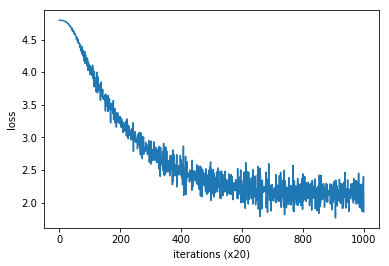

In [11]:
# 学習コード
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'you say goodbye and i say hello. becouse i will not to say goodbye.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [12]:
from common.util import most_similar

In [16]:
word_vecs = model.word_vecs
most_similar('will', word_to_id, id_to_word, word_vecs, top=5)


[query] will
 becouse: 0.521129608154
 and: 0.325532197952
 to: 0.23680138588
 say: 0.0828015059233
 .: -0.0833406001329
